## Clase 5 - Introducción a Pandas para manejo de datos
INSPT - Computación 3 - Física y Física Aplicada</br>
Daiana Dominikow - 2024

En esta clase vamos a trabajar con Pandas, que es una biblioteca opensource para manipulación y análisis de datos basada en Numpy, ofrece estructuras y operaciones para manejo de tablas numéticas.</br>
Un DataFrame es una estructura de datos relacional, es decir, se asemeja a una planilla de cálculo con columnas y filas indexadas.</br>
Para trabajar con mucha información, a veces termina siendo conveniente trabajar con una tabla en lugar de varios arreglos como hicimos hasta el momento, ya sea para presentarla prolijamente o exportarla a un archivo de texto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Para nuestro ejemplo, supongamos que la posición de una partícula responde a la siguiente ecuación horaria:</br>

$x(t)= cos(at) + bt^5 +ct^4$</br>

donde</br>
$a = 0.2 \mathrm{s}^{-1}$</br>
$b = 0.95 \times 10^{-8}\mathrm{m}$</br>
$c = -10^{-6} \mathrm{m}$


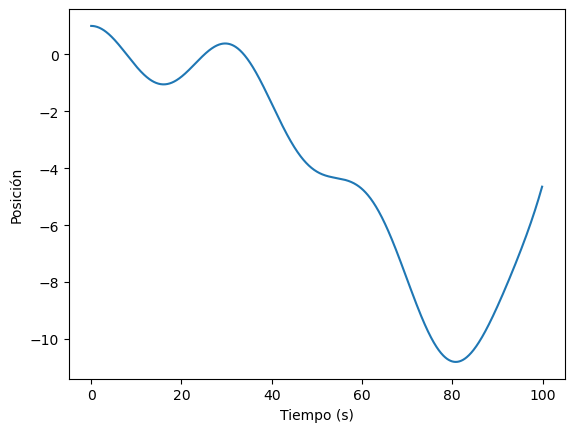

In [2]:
a = 0.2
b = 0.95e-8
c = -1e-6

def x(t):
    return np.cos(a*t) + b*t**5 + c*t**4

#invento un intervalo de tiempo
h = 0.1
t = np.arange(0,100,h)

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición')
plt.plot(t,x(t))

### Como convierto mis arreglos en un solo dataframe?

In [3]:
#Veamos que al imprimir nuestros arreglos, estos se encuentran en linea horizontal
print(x(t))
print(t)

[ 1.00000000e+00  9.99800007e-01  9.99200105e-01  9.98200532e-01
  9.96801681e-01  9.95004103e-01  9.92808507e-01  9.90215758e-01
  9.87226877e-01  9.83843042e-01  9.80065587e-01  9.75896001e-01
  9.71335925e-01  9.66387157e-01  9.61051648e-01  9.55331499e-01
  9.49228964e-01  9.42746448e-01  9.35886506e-01  9.28651839e-01
  9.21045298e-01  9.13069880e-01  9.04728727e-01  8.96025125e-01
  8.86962502e-01  8.77544427e-01  8.67774611e-01  8.57656900e-01
  8.47195280e-01  8.36393870e-01  8.25256923e-01  8.13788824e-01
  8.01994088e-01  7.89877357e-01  7.77443402e-01  7.64697114e-01
  7.51643512e-01  7.38287730e-01  7.24635024e-01  7.10690765e-01
  6.96460437e-01  6.81949638e-01  6.67164072e-01  6.52109554e-01
  6.36792002e-01  6.21217436e-01  6.05391978e-01  5.89321845e-01
  5.73013351e-01  5.56472902e-01  5.39706993e-01  5.22722209e-01
  5.05525215e-01  4.88122762e-01  4.70521679e-01  4.52728871e-01
  4.34751316e-01  4.16596065e-01  3.98270234e-01  3.79781006e-01
  3.61135626e-01  3.42341

In [4]:
#Nosotros necesitamos pivotearlos para convertirlos en una tabla,  para tal fin, vamos a utilizar la función Transpose.
data = np.transpose([x(t),t])
print(data)

[[ 1.          0.        ]
 [ 0.99980001  0.1       ]
 [ 0.99920011  0.2       ]
 ...
 [-4.75977323 99.7       ]
 [-4.70434068 99.8       ]
 [-4.64839241 99.9       ]]


In [5]:
#y le damos nombres a las columnas de nuestro futuro dataframe dentro de una lista
columns = ['posicion','tiempo']
# para crear nuestro dataframe, al cual le pasaremos como parámetros  el arreglo transpuesto y el nombre de las columnas usamos la función DataFrame
df = pd.DataFrame(data, columns = columns)

print(df)

     posicion  tiempo
0    1.000000     0.0
1    0.999800     0.1
2    0.999200     0.2
3    0.998201     0.3
4    0.996802     0.4
..        ...     ...
995 -4.869133    99.5
996 -4.814700    99.6
997 -4.759773    99.7
998 -4.704341    99.8
999 -4.648392    99.9

[1000 rows x 2 columns]


Otra manera de hacer lo mismo

In [6]:
# y si se dan un poco de maña, podemos omitir todo lo anterior y hacer lo mismo rápidamente de la siguiente manera directamente con nuestros arreglos
df_2 =  pd.DataFrame({
        'posicion': x(t) ,
        'tiempo': t
        })
print(df_2)


     posicion  tiempo
0    1.000000     0.0
1    0.999800     0.1
2    0.999200     0.2
3    0.998201     0.3
4    0.996802     0.4
..        ...     ...
995 -4.869133    99.5
996 -4.814700    99.6
997 -4.759773    99.7
998 -4.704341    99.8
999 -4.648392    99.9

[1000 rows x 2 columns]


Ahora bien... Cómo ploteo la info en un DataFrame?

In [7]:
# para traerme solo una columna del dataframe, basta con castear el nombre de la columna entre corchetes
print(df['posicion'])

0      1.000000
1      0.999800
2      0.999200
3      0.998201
4      0.996802
         ...   
995   -4.869133
996   -4.814700
997   -4.759773
998   -4.704341
999   -4.648392
Name: posicion, Length: 1000, dtype: float64


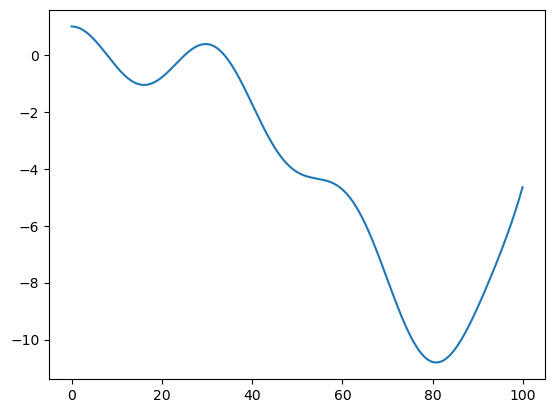

In [8]:
# para plotear el gráfico que obtuvimos inicialmente entonces:
plt.plot(df['tiempo'],df['posicion'])

Como obtengo los valores dado un índice?

In [9]:
#de manera similar a numpy, si quiero obtener el valor en un índice dado, por ejemplo, el valor de la posición para la 4ta fila:
df['posicion'][3]

0.9982005318582892

#### Pandas permite filtrar los datos, para hacer esto usaremos la funcion $loc$ </br> 

sintaxis:</br>
DataFrame.loc[ (condicion 1) ]</br>

operador AND: </br>
DataFrame.loc[  (condicion 1) &  (condicion 2) ]</br>

operador OR:</br>
DataFrame.loc[  (condicion 1) | (condicion 2) ]</br>

In [10]:
#Suponiendo que quiero solo los valores de posición positivos, dentro de los primeros 30 segundos
df.loc[ (df['posicion'] > 0) & (df['tiempo'] < 30) ]

,posicion,tiempo
0,1.000000,0.0
1,0.999800,0.1
2,0.999200,0.2
3,0.998201,0.3
4,0.996802,0.4
...,...,...
295,0.382387,29.5
296,0.382979,29.6
297,0.383141,29.7
298,0.382870,29.8


Al mismo tiempo, permite guardar la info en distintos formatos, por simplicidad, usaremos csv y dejaremos el archivo en el directorio donde nuestro código se encuentra alojado

In [11]:
#la función recibe como parámetro el directorio a dejar el archivo, y si queremos o no que las filas conserven el indice, es decir, que se guarde en otra columna
nombre_archivo = './clase5_data_ejemplo.csv'
df.to_csv(nombre_archivo, index=False)

Para levantar un archivo el procedimiento es muy similar

In [12]:
df2= pd.read_csv(nombre_archivo)
df2

,posicion,tiempo
0,1.000000,0.0
1,0.999800,0.1
2,0.999200,0.2
3,0.998201,0.3
4,0.996802,0.4
...,...,...
995,-4.869133,99.5
996,-4.814700,99.6
997,-4.759773,99.7
998,-4.704341,99.8


### Cómo guardo el resultado de una operación en una columna?
Para crear una nueva columna, basta con asignarle un nombre y a qué operación corresponde:

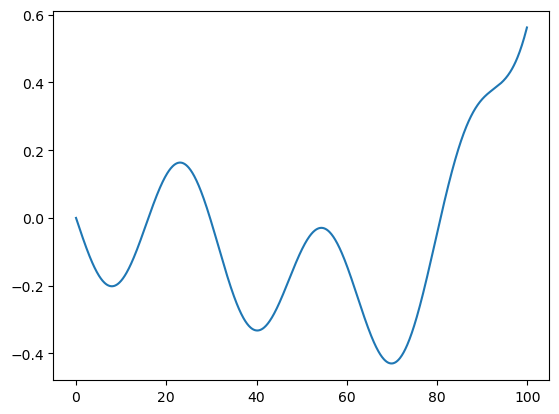

In [13]:
def derivada(t):
    return   ( x(t+h) - x(t-h) ) / (2*h)

df['velocidad'] = derivada( df['tiempo'] )

plt.plot(df['tiempo'],df['velocidad'])

Ahora si, a hacer la guía de Pandas! :)